<a href="https://colab.research.google.com/github/ParsaMohammadpour/face-detection/blob/main/face-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import sys
from google.colab.patches import cv2_imshow

In [2]:
class FaceDetection():
    def __init__(self, img, color=(0, 0, 255), thickness=2):
        self.img = img.copy()
        self.color = color
        self.thickness = thickness

    def detect(self, show_result=True):
        # convert image to gray scale image
        gray_img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        # making face detector model
        face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        # detecting faces
        face_cordinates = face_detector.detectMultiScale(
                                      gray_img,
                                      scaleFactor=1.1,
                                      minNeighbors=5,
                                      minSize=(30,30),
                                      flags=cv2.CASCADE_SCALE_IMAGE)
        # drawing a rectangle around faces
        for (x, y, w, h) in face_cordinates:
            start_point = (x, y)
            end_point = (x+w, y+h)
            cv2.rectangle(self.img, start_point, end_point, self.color, self.thickness)
            # showing image
        if show_result:
            cv2_imshow(self.img)
        return self.img

In [3]:
video_capturer = cv2.VideoCapture(0)
ret, frame = video_capturer.read()
img = frame

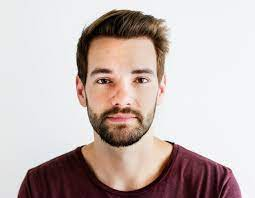

In [4]:
img = cv2.imread('image.jpg')
cv2_imshow(img)

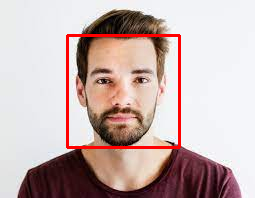

True

In [5]:
face_detection = FaceDetection(img)
result_img = face_detection.detect()
cv2.imwrite('face-detected-image.jpg', result_img)